Para realizar esta practica sera necesario utilizar las librerias

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# 1. Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

maxfil=12, value=56100


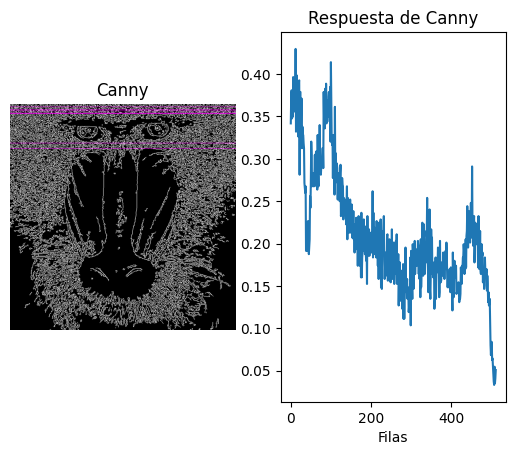

In [28]:
img = cv2.imread('mandril.jpg')
purple = (255, 0 , 255,)

if img is None:
    raise IOError('Imagen no encontrada')

canny = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 100, 200)

col_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[:, 0]
maxcol = np.argmax(col_counts)
print(f"maxfil={maxcol}, value={col_counts[maxcol]}")
h, w = canny.shape[:2]
cols = col_counts / (255 * w)
white_count_threshold = 0.9 * col_counts[maxcol]

canny = cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB)
for i in range(h):
    if col_counts[i] >= white_count_threshold:
        cv2.line(canny, (0, i), (w, i), purple, 1)

plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(cols)

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

In [3]:
from cv2 import Mat
from numpy import ndarray


def get_horizontal_lines(img: Mat) -> tuple[Mat, ndarray[tuple[float, ...]]]:
    row_counts = cv2.reduce(img, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[:, 0]

    maxrow = np.argmax(row_counts)
    h, w = img.shape[:2]
    rows = row_counts / (255 * w)
    white_count_threshold = 0.9 * row_counts[maxrow]

    result_img = np.zeros((h, w), dtype=np.uint8)
    for i in range(h):
        if row_counts[i] >= white_count_threshold:
            cv2.line(result_img, (0, i), (w, i), 255, 1)
    return (result_img, rows)

def get_vertical_lines(img: Mat) -> tuple[Mat, ndarray[tuple[float, ...]]]:
    col_counts = cv2.reduce(img, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[0]

    maxcol = np.argmax(col_counts)
    h, w = img.shape[:2]
    cols = col_counts / (255 * h)
    white_count_threshold = 0.9 * col_counts[maxcol]

    result_img = np.zeros((h, w), dtype=np.uint8)
    for i in range(w):
        if col_counts[i] >= white_count_threshold:
            cv2.line(result_img, (i, 0), (i, h), 255, 1)
    return (result_img, cols)

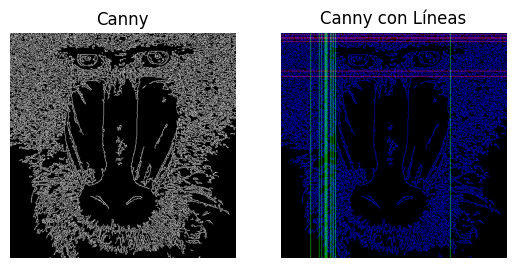

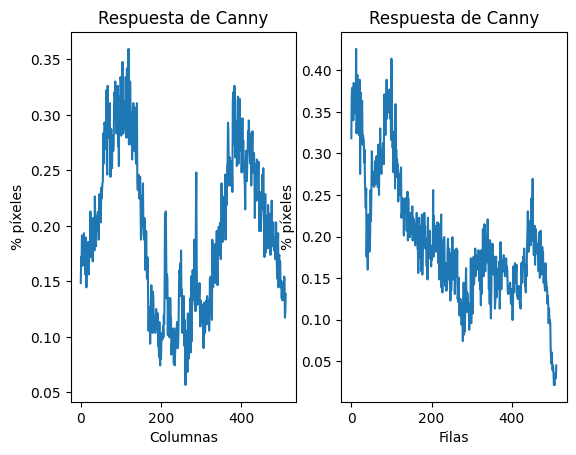

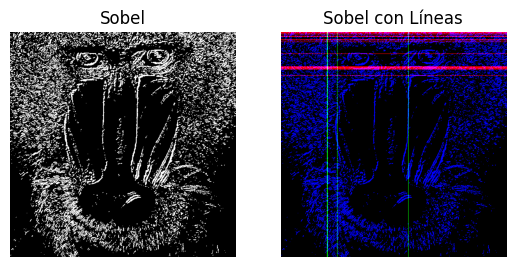

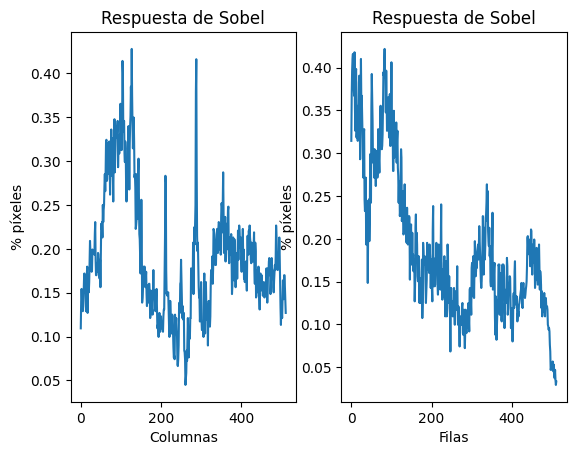

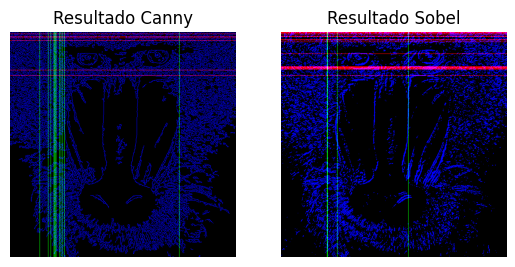

In [4]:
img = cv2.imread('mandril.jpg')

if img is None:
    raise IOError('Imagen no encontrada')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h, w = gray.shape

# Sobel
ggray = cv2.GaussianBlur(gray, (3, 3), 0)
sobelx = cv2.Sobel(ggray, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggray, cv2.CV_64F, 0, 1)  # y
sobel = cv2.convertScaleAbs(cv2.add(sobelx, sobely))
_, sobel = cv2.threshold(sobel, 100, 255, cv2.THRESH_BINARY)

sobel_linesx, sobel_rows = get_horizontal_lines(sobel)
sobel_linesy, sobel_cols = get_vertical_lines(sobel)

sobel_lines = np.zeros((h, w, 3), dtype=np.uint8)
sobel_lines[:, :, 0] = sobel_linesx
sobel_lines[:, :, 1] = sobel_linesy
sobel_lines[:, :, 2] = sobel

# Canny
canny = cv2.Canny(gray, 100, 250)

canny_linesx, canny_rows = get_horizontal_lines(canny)
canny_linesy, canny_cols = get_vertical_lines(canny)

canny_lines = np.zeros((h, w, 3), dtype=np.uint8)
canny_lines[:, :, 0] = canny_linesx
canny_lines[:, :, 1] = canny_linesy
canny_lines[:, :, 2] = canny
hor, ver = 2, 1

# Canny
plt.figure()
plt.subplot(ver, hor, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(ver, hor, 2)
plt.axis("off")
plt.title("Canny con Líneas")
plt.imshow(canny_lines) 

plt.figure()
plt.subplot(ver, hor, 1)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(canny_cols)

plt.subplot(ver, hor, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(canny_rows)

# Sobel
plt.figure()
plt.subplot(ver, hor, 1)
plt.axis("off")
plt.title("Sobel")
plt.imshow(sobel, cmap='gray') 

plt.subplot(ver, hor, 2)
plt.axis("off")
plt.title("Sobel con Líneas")
plt.imshow(sobel_lines) 

plt.figure()
plt.subplot(ver, hor, 1)
plt.title("Respuesta de Sobel")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(sobel_cols)

plt.subplot(ver, hor, 2)
plt.title("Respuesta de Sobel")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(sobel_rows)

# Comparación Final
plt.figure()
plt.subplot(ver, hor, 1)
plt.axis("off")
plt.title("Resultado Canny")
plt.imshow(canny_lines)

plt.subplot(ver, hor, 2)
plt.axis("off")
plt.title("Resultado Sobel")
plt.imshow(sobel_lines) 


comentar los resultados


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [5]:
from enum import Enum

modes = [
    (0, "Default"),
    (1, "Invert"),
    (2, "Canny")
]

class KeyCode(Enum):
    ESC = 27
    LEFT_ARROW = 81
    RIGHT_ARROW = 83

In [6]:
vid = cv2.VideoCapture(0)
current_mode = modes[0]

font_size = 24
font = ImageFont.truetype("font/JetBrainsMono.ttf", font_size)


while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if not ret:
        break

    frame = cv2.flip(frame, 1)

    if current_mode[0] == 1:
        frame = 255 - frame
    elif current_mode[0] == 2:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame = cv2.GaussianBlur(frame, (3, 3), 1)
        frame = cv2.Canny(frame, 100 , 255)
        frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)

    pil_image = Image.fromarray(frame) 
    draw = ImageDraw.Draw(pil_image)

    draw.text(
        (20, 30),
        f"Mode: {current_mode[1]}",
        fill=(0, 0, 0),
        font=font,
        stroke_width=1,
        stroke_fill=(255, 255, 255)
    )

    cv2.imshow('Demo', np.array(pil_image))
  
    key_code = cv2.waitKey(20)
    if key_code == KeyCode.ESC.value:
        break
    elif key_code == KeyCode.LEFT_ARROW.value:
        current_mode = modes[(current_mode[0] - 1) % len(modes)]
    elif key_code == KeyCode.RIGHT_ARROW.value:
        current_mode = modes[(current_mode[0] + 1) % len(modes)]

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

83 derecha
81 izquierda

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [10]:
vid = cv2.VideoCapture(0)

background_remover = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

is_first_frame: bool = True
painting = None
paint_threshold = 100

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
    if not ret:
        break

    if is_first_frame:
        is_first_frame = False
        h, w = frame.shape[:2]
        painting = np.zeros((h, w), dtype=np.uint8)

    frame = cv2.flip(frame, 1)
    objects = background_remover.apply(frame)
    background = background_remover.getBackgroundImage()

    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    blue_mask = cv2.inRange(frame_hsv, (90, 50, 30), (120, 255, 255))
    blue_mask = cv2.bitwise_and(objects, objects, mask=blue_mask)
    blue_objects = cv2.bitwise_and(frame[:, :, 0], frame[:, :, 0], mask=blue_mask)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(blue_objects)

    if max_val > paint_threshold:
        cv2.circle(painting, max_loc, 5, (255,), -1)
    
    result = cv2.add(frame, cv2.cvtColor(painting, cv2.COLOR_GRAY2BGR))

    cv2.imshow('Goal', result)
  
    key_code = cv2.waitKey(20)
    if key_code == KeyCode.ESC.value:
        break
    elif key_code == KeyCode.RIGHT_ARROW.value:
        h, w = frame.shape[:2]
        painting = np.zeros((h, w), dtype=np.uint8)

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

para la última tarea se podría elegir un color para pintar donde se detacta algo de otro color especifico.

es decir, detectar diferencias de un canal de color por ejemplo, detectar donde este el mayor cambio y pintar ahí si se supero un umbral.

Capturar el fondo, hacer la diferencia en uno de los canales, hacer umbralizado con truncamiento para quedarte con valores superiores a threshold, encontrar el pixel intenso de ese canal y pintar un circulo allí. Importante: pintas y muestras sobre el fondo, no sobre la imagen actual.

175 a 240